<a href="https://colab.research.google.com/github/dewhitee/ml/blob/main/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, r2_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow.keras.metrics
from keras.metrics import categorical_accuracy, binary_accuracy
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [174]:
### Part 1
# 1.2.: Loading dataset
heart_failures = np.genfromtxt('heart_failure_clinical_records_dataset.csv', 
                               delimiter=',', skip_header=1)
heart_failures_csv = read_csv('heart_failure_clinical_records_dataset.csv')
heart_failures_csv

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [175]:
heart_failures_csv.keys()[0]

'age'

In [176]:
# 1.3.: Number of observations and variables
n, m = heart_failures.shape
print("Number of observations: ", n)
print("Number of variables: ", m)

total_observations = n
total_variables = m

Number of observations:  299
Number of variables:  13


In [177]:
# 1.6.: First five observations
np.set_printoptions(suppress=True)
print(heart_failures[:5])

[[    75.        0.      582.        0.       20.        1.   265000.
       1.9     130.        1.        0.        4.        1.  ]
 [    55.        0.     7861.        0.       38.        0.   263358.03
       1.1     136.        1.        0.        6.        1.  ]
 [    65.        0.      146.        0.       20.        0.   162000.
       1.3     129.        1.        1.        7.        1.  ]
 [    50.        1.      111.        0.       20.        0.   210000.
       1.9     137.        1.        0.        7.        1.  ]
 [    65.        1.      160.        1.       20.        0.   327000.
       2.7     116.        0.        0.        8.        1.  ]]


In [178]:
# 1.7.: Splitting dataset
train, test = train_test_split(heart_failures, shuffle=False,
                               train_size=0.75, test_size=0.25)

### Part 2
# 2.1.: Splitting data for training and validation
x_train = train[:, :m - 1]
y_train = train[:, m - 1]

x_test = test[:, :m - 1]
y_test = test[:, m - 1]

In [179]:
# ########################### Decision surface
# def decision_surface():
#     n_classes = 2
#     plot_colors = "ryb"
#     plot_step = 0.02
#     for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                        [1, 2], [1, 3], [2, 3]]):
#         X = heart_failures[:, pair]
#         y = heart_failures[:, m - 1]

#         clf = DecisionTreeClassifier().fit(X, y)

#         # Plot the decision boundary
#         plt.subplot(2, 3, pair_index + 1)

#         x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#         y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#         xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                              np.arange(y_min, y_max, plot_step))
#         plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

#         decision_surface_x = heart_failures[:, :m - 1]
#         decision_surface_y = heart_failures[:, m - 1]

#         Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#         Z = Z.reshape(xx.shape)
#         cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#         plt.xlabel(heart_failures_csv.keys()[pair[0]])
#         plt.ylabel(heart_failures_csv.keys()[pair[1]])

#         plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#         for i, color in zip(range(n_classes), plot_colors):
#             index = np.where(decision_surface_y == i)
#             plt.scatter(X[index, 0],
#                         X[index, 1],
#                         c=color,
#                         label=heart_failures_csv.keys()[i],
#                         cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

#         plt.axis('tight')
#         plt.show()

# decision_surface()
# ############################################

In [180]:
# 2.2.: Decision tree algorithm
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=1)

In [181]:
# 2.3.: Train algorithm on the training set to estimate performance
# on the testing set
decision_tree_classifier.fit(x_train, y_train)
dtc_y_predicted = decision_tree_classifier.predict(x_test)

In [182]:
# 2.4.: Display count of leaves, depth and gini
print("Count of leaves: ", decision_tree_classifier.get_n_leaves())
print("Depth: ", decision_tree_classifier.get_depth())
print("Gini: ", decision_tree_classifier.score(x_test, y_test))

Count of leaves:  40
Depth:  10
Gini:  0.8266666666666667


In [183]:
# 2.5.: Count accuracy for training and test splits
print("Accuracy: ", accuracy_score(y_test, dtc_y_predicted))
print("Training split accuracy: ",
      decision_tree_classifier.score(x_train, y_train))
print("Test split accuracy: ",
      decision_tree_classifier.score(x_test, y_test))

Accuracy:  0.8266666666666667
Training split accuracy:  1.0
Test split accuracy:  0.8266666666666667


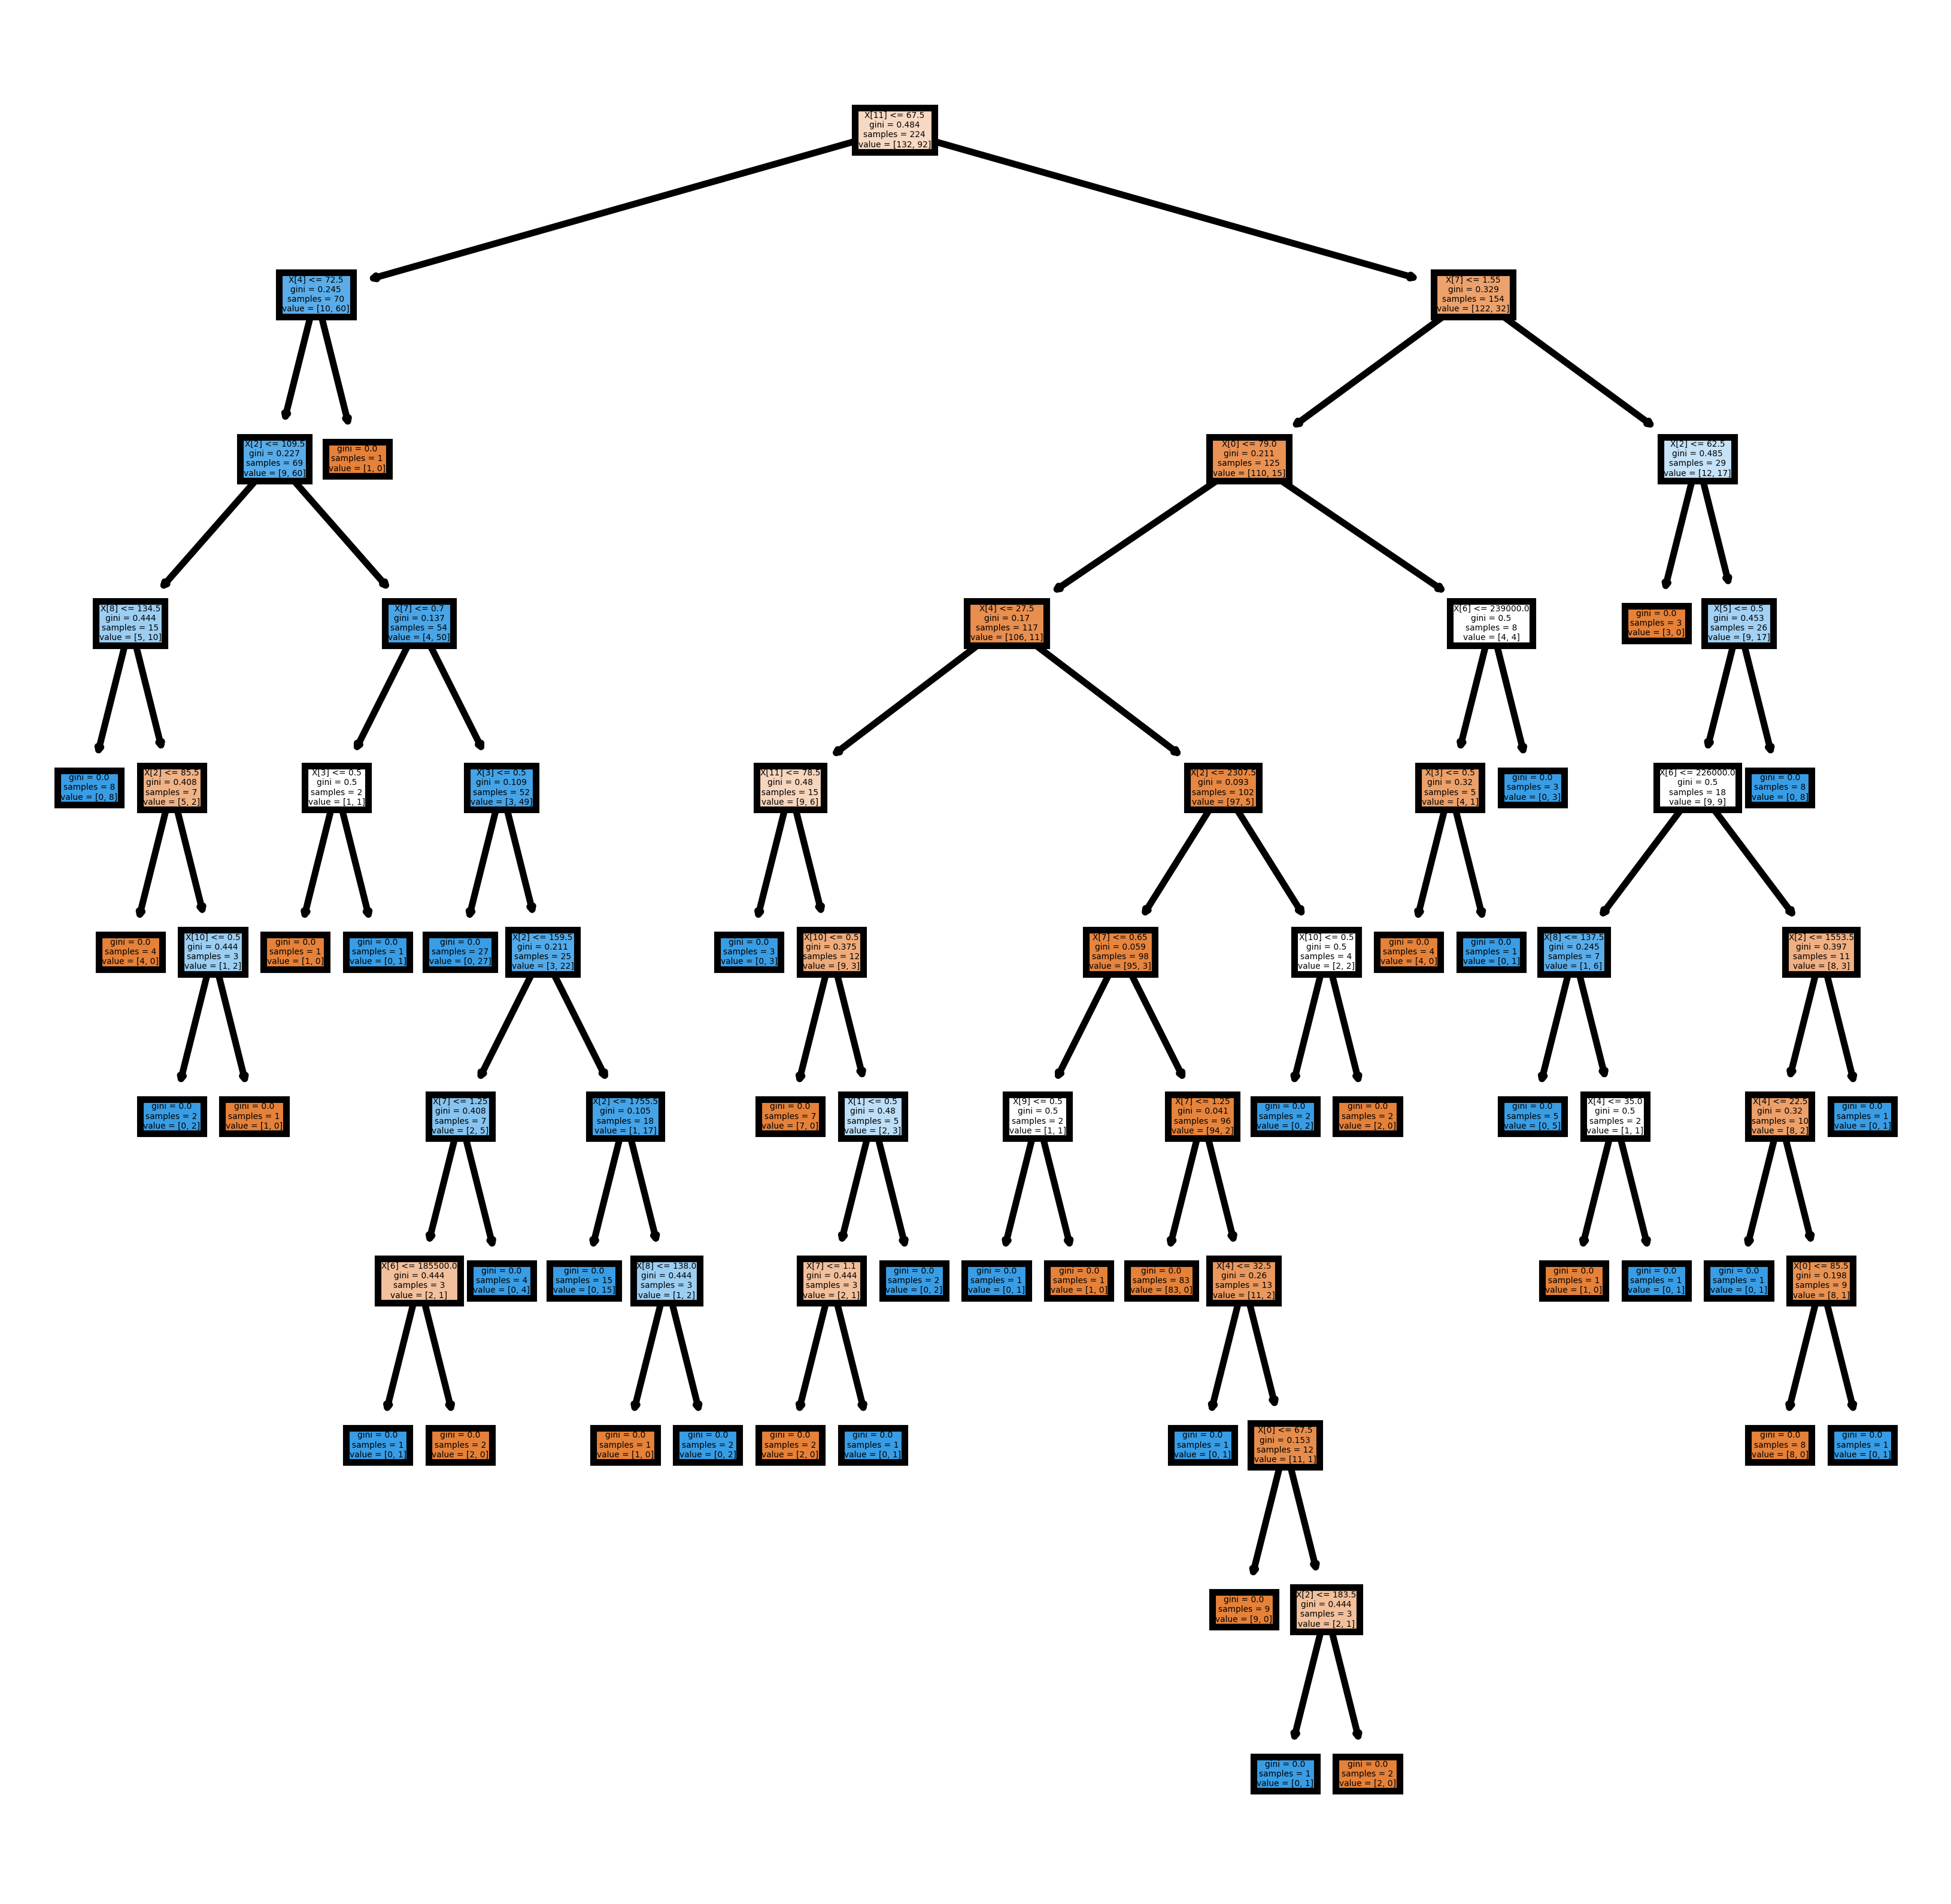

In [184]:
# 2.6.: Display trained model graphically
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=800)
plot_tree(decision_tree_classifier, filled=True)
plt.show()

In [185]:
### Part 3
# 3.1.: Splitting data for training and validation
# already done above

In [186]:
# 3.2.: Logistic regression algorithm
logistic_regression_classifier = linear_model.LogisticRegression()

In [187]:
# 3.3.: Train algorithm on the training set to estimate performance
# on the testing set
logistic_regression_classifier.fit(x_train, y_train)
lr_y_predicted = logistic_regression_classifier.predict(x_test)

In [188]:
# 3.4.: Display coefficients and free root
print("logistic regression coefficient: ", logistic_regression_classifier.coef_)
print("logistic regression intercept: ", logistic_regression_classifier.intercept_)

logistic regression coefficient:  [[ 0.04987363  0.00028658  0.00015055  0.00037763 -0.06447915  0.00008575
  -0.00000072  0.00641817  0.00670609 -0.00033934 -0.00033477 -0.02066114]]
logistic regression intercept:  [0.00016944]


In [189]:
# 3.5.: Count accuracy for training and test splits
print("Confusion matrix: ")
print(confusion_matrix(y_test, lr_y_predicted))

print("Recall: ", 
      sum(recall_score(y_test, lr_y_predicted, average=None)/total_variables))
print("Precision: ", 
      sum(precision_score(y_test, lr_y_predicted, average=None)/total_variables))
print("Training split accuracy: ", 
      logistic_regression_classifier.score(x_train, y_train))
print("Test split accuracy: ",
      logistic_regression_classifier.score(x_test, y_test))
print("Accuracy using accuracy score: ", accuracy_score(y_test, lr_y_predicted))
print("F1-Score: ", 
      sum(f1_score(y_test, lr_y_predicted, average=None)/total_variables))


Confusion matrix: 
[[71  0]
 [ 4  0]]
Recall:  0.07692307692307693
Precision:  0.07282051282051281
Training split accuracy:  0.7901785714285714
Test split accuracy:  0.9466666666666667
Accuracy using accuracy score:  0.9466666666666667
F1-Score:  0.07481559536354056


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
### Part 4
# 4.1.: Splitting data for training and validation
# already done above

In [245]:
# 4.2.: Multilayer percepton algorithm
def get_multilayer_perceptron_model(width, depth, optimizer, activation,
                                    dropout, activity_regularizer):
    model = keras.Sequential()
    model.add(layers.Dropout(dropout))
    for i in range(depth):
        model.add(layers.Dense(width, activation=activation,
                               activity_regularizer=activity_regularizer))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(m, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

def get_multilayer_perceptron_model_2(width, depth, optimizer, activation,
                                      dropout, activity_regularizer):
    model = keras.Sequential()
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(m-1, input_dim=m-1, activation='relu', 
                           activity_regularizer=activity_regularizer))
    for i in range(depth):
        model.add(layers.Dense(width, activation=activation,
                               activity_regularizer=activity_regularizer))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def get_multilayer_perceptron_model_binary():
    model = keras.Sequential()
    model.add(layers.Dense(m-1, input_dim=m-1, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

mlp_model = get_multilayer_perceptron_model(1000, 5, 'adam', 'relu',
    dropout=0.0,
    activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3))

mlp_binary_model = get_multilayer_perceptron_model_binary()

mlp_model_2 = get_multilayer_perceptron_model_2(1000, 5, 'adam', 'relu',
    dropout=0.05,
    activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3))


In [246]:
# 4.3.: Train algorithm on the training set to estimate performance
# on the testing set
test_batch_size = 15
test_epochs_size = 25

print('Categorical cross-entropy test ---------------------------')
mlp_history = mlp_model.fit(x_train, y_train, batch_size=test_batch_size, 
                            epochs=test_epochs_size, verbose=1)

print('Binary cross-entropy test ---------------------------')
mlp_binary_history = mlp_binary_model.fit(x_train, y_train, batch_size=test_batch_size, 
                                          epochs=test_epochs_size, verbose=1)

print('Binary cross-entropy ver2 test ----------------------------')
mlp_history_2 = mlp_model_2.fit(x_train, y_train, batch_size=test_batch_size,
                                epochs=test_epochs_size, verbose=1)

Categorical cross-entropy test ---------------------------
Epoch 1/25
15/15 [==============================] - 2s 33ms/step - loss: 83219905.0000 - accuracy: 0.1135
Epoch 2/25
15/15 [==============================] - 1s 33ms/step - loss: 36186020.5000 - accuracy: 0.5635
Epoch 3/25
15/15 [==============================] - 1s 34ms/step - loss: 20455908.2500 - accuracy: 0.5578
Epoch 4/25
15/15 [==============================] - 0s 33ms/step - loss: 9982049.4062 - accuracy: 0.6235
Epoch 5/25
15/15 [==============================] - 0s 33ms/step - loss: 3987562.6719 - accuracy: 0.4554
Epoch 6/25
15/15 [==============================] - 1s 34ms/step - loss: 1555684.9141 - accuracy: 0.6265
Epoch 7/25
15/15 [==============================] - 0s 33ms/step - loss: 617055.8320 - accuracy: 0.5564
Epoch 8/25
15/15 [==============================] - 1s 34ms/step - loss: 196413.1533 - accuracy: 0.5443
Epoch 9/25
15/15 [==============================] - 0s 32ms/step - loss: 59645.8755 - accuracy: 0.60

In [205]:
# 4.4.: Display vector of weights (coefficients) and free root
print("Vector of weights: ", mlp_model)
print("Free root: ", mlp_model.history.model)

Vector of weights:  <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f995f3c8f10>
Free root:  <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f995f3c8f10>


In [206]:
# 4.5.: Calculate accuracy for training and testing splits
score = mlp_model.evaluate(x_test, y_test)
print('Training split loss: ', mlp_history.history['loss'][-1])
print('Training split accuracy: ', mlp_history.history['accuracy'][-1])
print('Test split loss: ', score[0])
print('Test split accuracy: ', score[1])

3/3 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.9333
Training split loss:  2.528834581375122
Training split accuracy:  0.7455357313156128
Test split loss:  0.6796776056289673
Test split accuracy:  0.9333333373069763


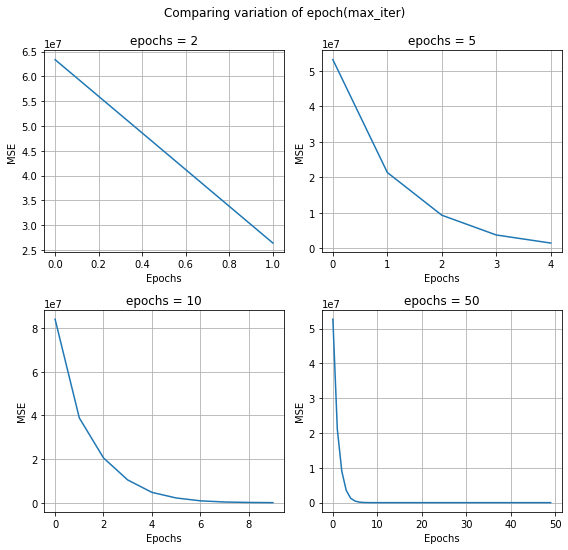

In [208]:
# 4.6.: Research how variation of epoch(max_iter) parameter affects
# model performance. Display graphically

def run_model(width, depth, optimizer, activation, dropout, activity_regularizer,
              batch_size, epochs, index, title):
    model = KerasRegressor(build_fn=get_multilayer_perceptron_model, 
                           width=width,
                           depth=depth,
                           optimizer=optimizer,
                           activation=activation,
                           dropout=dropout,
                           activity_regularizer=activity_regularizer,
                           batch_size=batch_size,
                           epochs=epochs,
                           verbose=0)
    history = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    plt.subplot(2, 2, index+1)
    plt.plot([i for i in history.history['loss']])
    plt.grid()
    plt.title(title)
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.figure(figsize=(8, 8)) 

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=2, index=0, title=f'epochs = {2}')
##
run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=5, index=1, title=f'epochs = {5}')
##
run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=2, title=f'epochs = {10}')
##
run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=50, index=3, title=f'epochs = {50}')

plt.suptitle("Comparing variation of epoch(max_iter)")
plt.show()

Comparing variation of width


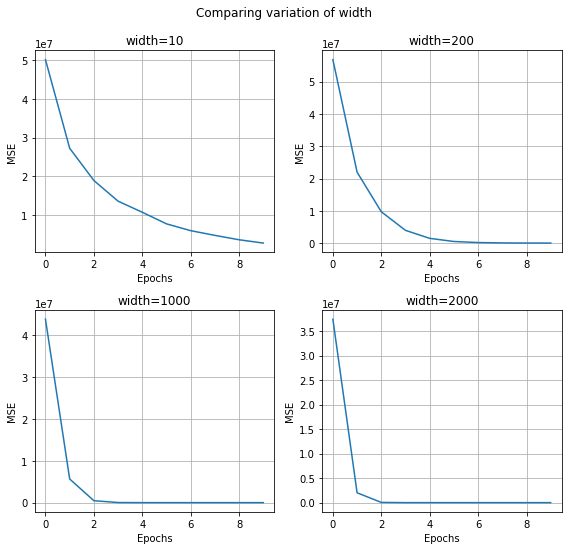

Comparing variation of depth


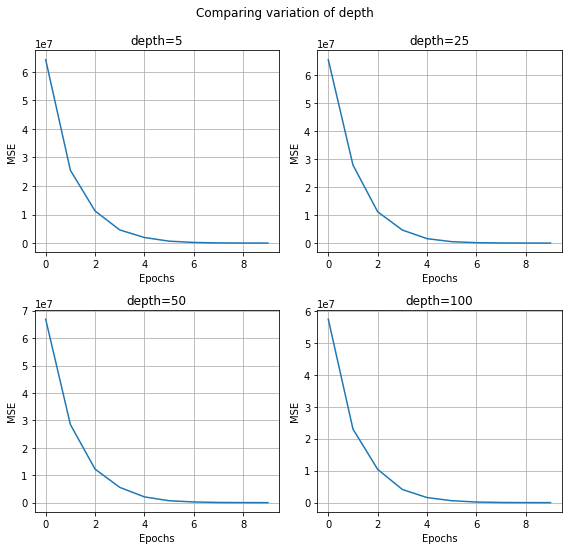

In [196]:
# 4.7.: Research how change of depth (count of hidden layers) and
# width (count of neurons in layer) affects model performance.

# Variation of width
print("Comparing variation of width")
plt.figure(figsize=(8, 8)) 

run_model(width=10, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=0, title=f'width={10}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=1, title=f'width={200}')

run_model(width=1000, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=2, title=f'width={1000}')

run_model(width=2000, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=3, title=f'width={2000}')

plt.suptitle("Comparing variation of width")
plt.show()

# Variation of depth
print("Comparing variation of depth")
plt.figure(figsize=(8, 8)) 

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=0, title=f'depth={5}')

run_model(width=200, depth=25, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=1, title=f'depth={25}')

run_model(width=200, depth=50, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=2, title=f'depth={50}')

run_model(width=200, depth=100, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=3, title=f'depth={100}')

plt.suptitle("Comparing variation of depth")
plt.show()

Comparing variation of l1 and l2


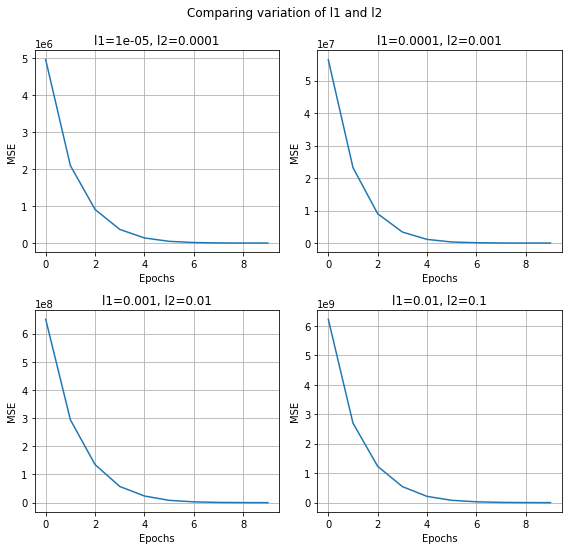

Comparing variation of dropout


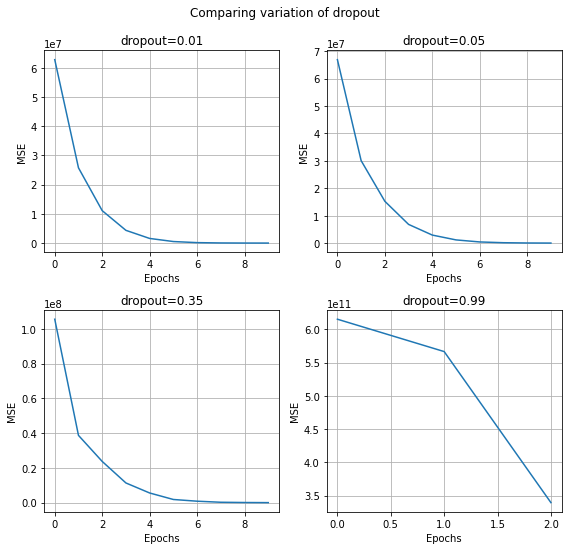

In [197]:
# 4.8.: Research how variation of regularization parameters (l1, l2)
# and Dropout affects model performance.

print("Comparing variation of l1 and l2")
plt.figure(figsize=(8, 8)) 

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    batch_size=5, epochs=10, index=0, title=f'l1={1e-5}, l2={1e-4}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=1, title=f'l1={1e-4}, l2={1e-3}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2),
    batch_size=5, epochs=10, index=2, title=f'l1={1e-3}, l2={1e-2}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-1),
    batch_size=5, epochs=10, index=3, title=f'l1={1e-2}, l2={1e-1}')

plt.suptitle("Comparing variation of l1 and l2")
plt.show()

print("Comparing variation of dropout")
plt.figure(figsize=(8, 8)) 

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.01, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=0, title=f'dropout={0.01}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.05, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=1, title=f'dropout={0.05}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.35, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=2, title=f'dropout={0.35}')

run_model(width=200, depth=5, optimizer='adam', activation='relu',
    dropout=0.99, activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3),
    batch_size=5, epochs=10, index=3, title=f'dropout={0.99}')

plt.suptitle("Comparing variation of dropout")
plt.show()

In [248]:
################ Models manual-testing
test_x_0 = np.array([[88,0,582,0,38,0,263358.03,1.83,134,0,0,95]])
test_x_1 = np.array([[35.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6]])
test_x_2 = np.array([[45.0,0,1720,0,38,0,270000.00,1.2,139,0,0,271]])
test_x_3 = np.array([[65,1,80,0,38,1,358000,4,131,1,1,10]])

def test_models(test_vec):
    print('Decision tree classifier test: ')
    for i, test_x in enumerate(test_vec):
        print(f'dtc_{i}: ', decision_tree_classifier.predict(test_x))
    print('----------------')
    print('Logistic regression classifier test: ')
    for i, test_x in enumerate(test_vec):
        print(f'lr_{i}: ', logistic_regression_classifier.predict(test_x))
    print('----------------')
    print('Multilayer perceptron test: ')
    for i, test_x in enumerate(test_vec):
        print(f'mlp_{i}: ', mlp_model.predict(test_x))
    print('----------------')
    print('Multilayer perceptron with binary_crossentropy: ')
    for i, test_x in enumerate(test_vec):
        print(f'binary mlp_{i}: ', mlp_binary_model.predict(test_x))
    print('----------------')
    print('Multilayer perceptron with binary_crossentropy ver2: ')
    for i, test_x in enumerate(test_vec):
        print(f'mlp_ver2_{i}: ', mlp_model_2.predict(test_x))

test_models([test_x_0, test_x_1, test_x_2, test_x_3])

Decision tree classifier test: 
dtc_0:  [1.]
dtc_1:  [1.]
dtc_2:  [0.]
dtc_3:  [1.]
----------------
Logistic regression classifier test: 
lr_0:  [1.]
lr_1:  [1.]
lr_2:  [0.]
lr_3:  [1.]
----------------
Multilayer perceptron test: 
mlp_0:  [[0.6655128  0.3299934  0.00039351 0.00096077 0.00021737 0.00019285
  0.00024247 0.00020696 0.00041339 0.00116829 0.0002722  0.00023894
  0.00018706]]
mlp_1:  [[0.01848481 0.9813763  0.00001198 0.00003565 0.00001069 0.00000559
  0.00000491 0.00000446 0.00000791 0.00002721 0.00001205 0.00001065
  0.00000786]]
mlp_2:  [[0.8645256  0.1264595  0.00087365 0.00166733 0.00047293 0.0004947
  0.00053728 0.00048608 0.00085869 0.00204092 0.00054946 0.00057882
  0.00045499]]
mlp_3:  [[0.16243845 0.835418   0.00015608 0.00049606 0.00009716 0.00007966
  0.00008825 0.00008075 0.00018063 0.00063309 0.00014454 0.00010794
  0.00007941]]
----------------
Multilayer perceptron with binary_crossentropy: 
binary mlp_0:  [[0.]]
binary mlp_1:  [[0.00000022]]
binary mlp_2: 